Climate Analysis

Data was pulled from Kaggle, https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data

During the analysis it was found that there has been a global increase trend in temperature, particularly over the last 30 years. In more developed countries the temperature began to register much earlier. Over time the accuracy of the observations is increased, that is quite natural. 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('../downloads/archive'))

['GlobalLandTemperaturesByCountry.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByCity.csv']


In [3]:
global_temp_country = pd.read_csv('../downloads/archive/GlobalLandTemperaturesByCountry.csv')
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
## drop missing data
global_temp_country.dropna(axis='index',how='any', subset=['AverageTemperature'],inplace=True)
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [5]:
data = global_temp_country


In [6]:
data['dt'] = pd.to_datetime(data['dt'])
data.dropna(subset=['AverageTemperature'], inplace=True)
country_data = data[data['Country'] == 'Kenya']  # Replace with your country of interest


In [7]:
country_data['year'] = country_data['dt'].dt.year
annual_temp = country_data.groupby('year')['AverageTemperature'].mean().reset_index()

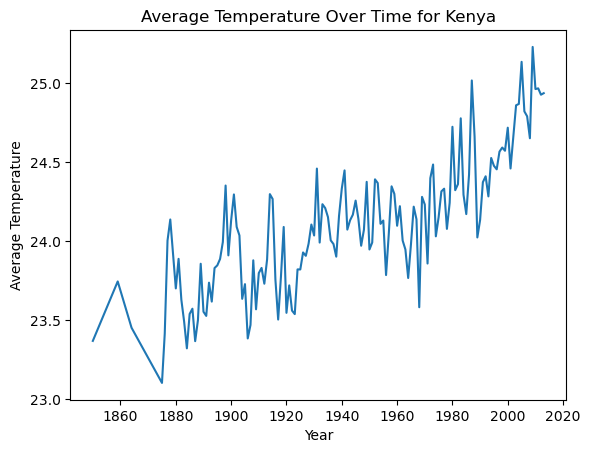

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='year', y='AverageTemperature', data=annual_temp)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time for Kenya')
plt.show()


In [9]:
import numpy as np
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(annual_temp['year'], annual_temp['AverageTemperature'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")


Slope: 0.008111364390382868, Intercept: 8.343470499548152, R-squared: 0.6428350987453514


In [10]:
#The slope of the line is approximately 0.0081, and the intercept is approximately 8.3434. The positive slope suggests that there has been a gradual increase in the average temperature over the years covered by the dataset.

In [11]:
# Higher temperatures can lead to increased likelihoods of droughts and heatwaves, which can be critical for planning purposes.

Public Awareness and Education: Visualizations to help the public understand the trends and the importance of climate resilience.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [14]:
global_temp = pd.read_csv('../downloads/archive/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [16]:
continent = ['Russia', 'United States', 'Kenya', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [[0] * len(years[70:]) for i in range(len(continent))]
j = 0

for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        year_str = str(year)  # Convert year to string
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].dt.year == int(year_str)]['AverageTemperature'].mean()
        i += 1
    j += 1


traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [17]:
!jupyter nbconvert --to html "Climate Analysis.ipynb"

[NbConvertApp] Converting notebook Climate Analysis.ipynb to html
[NbConvertApp] Writing 764319 bytes to Climate Analysis.html
